# Unemployment Data

Source: https://oui.doleta.gov/unemploy/claims.asp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop unnecessary columns
unemp = pd.read_csv('materials/unemployment.csv').drop(columns=['State', 'Reflecting Week Ended', 'Unnamed: 7', 
                                                                'Unnamed: 8', 'Unnamed: 9']).dropna()
# Rename columns
unemp.columns = ['week_filed', 'initial_claims', 'continued_claims', 'covered_employment', 'unemployment_rate']

# Turn 'week_filed' into datetime object, set as index, drop original 'week_filed' column
unemp.index = pd.to_datetime(unemp['week_filed'])
unemp.drop('week_filed', axis=1, inplace=True)

> #### Data Dictionary:
>
> `initial_claims`:     individuals filing for unemployment for the first time
>
> `continued_claims`:   individuals who have filed for two or more consecutive weeks
>
> `covered_employment`: individuals whose employer pays unemployment insurance
>
> `unemployment_rate`:  continued claims as a percentage of entire labor force

In [3]:
unemp.head()

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2000-01-08,"18,872","123,890","8,738,970",1.42
2000-01-15,"15,218","124,372","8,738,970",1.42
2000-01-22,"14,151","119,713","8,738,970",1.37
2000-01-29,"12,024","121,715","8,738,970",1.39
2000-02-05,"13,771","115,755","8,738,970",1.32


In [4]:
for col in unemp[['initial_claims', 'continued_claims', 'covered_employment']]:
    unemp[col] = unemp[col].apply(lambda x: str(x).replace(',', ''))
    unemp[col] = unemp[col].apply(lambda x: int(x) if x.isdigit() else x)

In [5]:
unemp.dtypes

initial_claims          int64
continued_claims        int64
covered_employment      int64
unemployment_rate     float64
dtype: object

### What's the overall pattern?

In [6]:
unemp['initial_claims'].sort_values(ascending=False).head(10)

week_filed
2017-09-02    63788
2017-09-09    52024
2008-09-27    49398
2008-09-20    35860
2010-01-09    32475
2009-03-14    31597
2008-10-04    31480
2009-01-17    31367
2005-10-08    30949
2013-01-12    30932
Name: initial_claims, dtype: int64

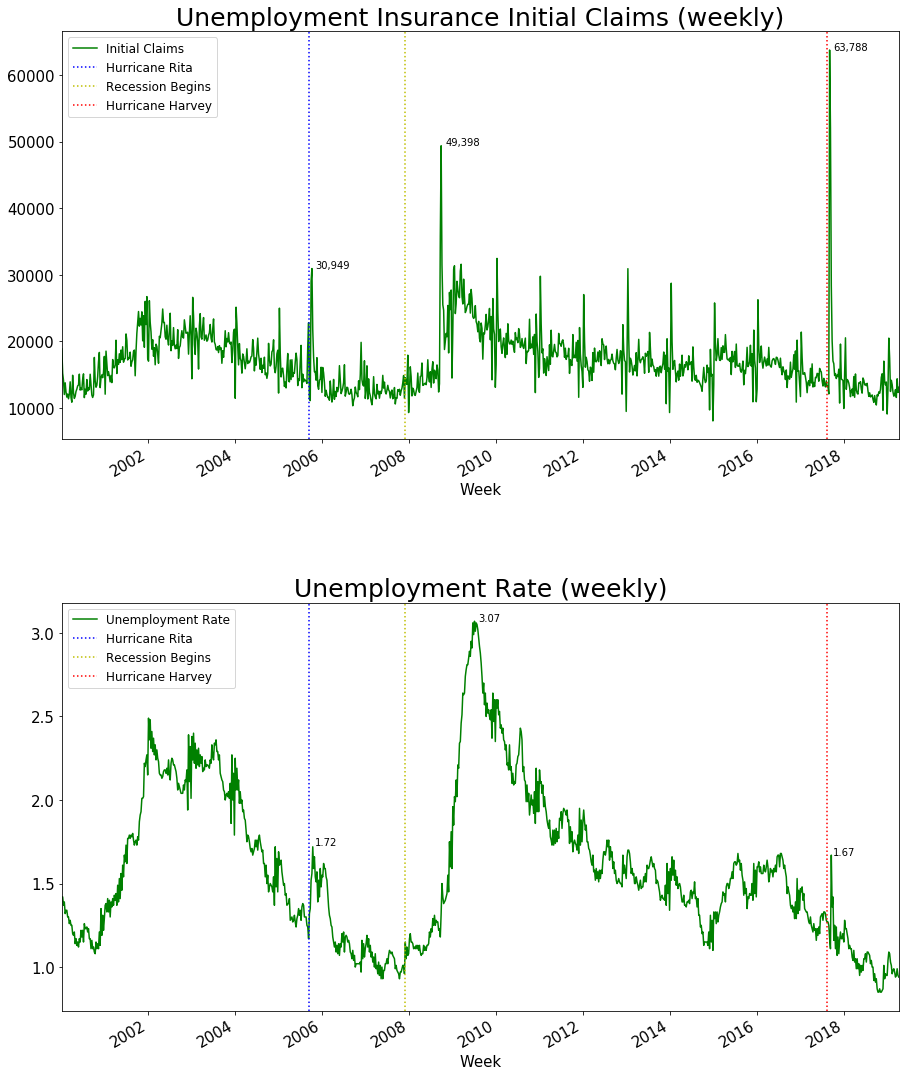

In [102]:
fig, axes = plt.subplots(2, figsize=(15, 20))

# Initial claims
unemp['initial_claims'].plot(c='g', fontsize=15, label='Initial Claims', ax=axes[0])
axes[0].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[0].text(x='2005-11', y=30951, s='30,949')

axes[0].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[0].text(x='2008-11', y=49400, s='49,398')

axes[0].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[0].text(x='2017-10', y=63800, s='63,788')

axes[0].set_xlabel('Week', fontsize=15)
axes[0].legend(fontsize='large')
axes[0].set_title('Unemployment Insurance Initial Claims (weekly)', fontsize=25);

# Unemployment rate
unemp['unemployment_rate'].plot(c='g', fontsize=15, label='Unemployment Rate', ax=axes[1])
axes[1].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[1].text(x='2005-11', y=1.73, s='1.72')

axes[1].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[1].text(x='2009-08', y=3.07, s='3.07')

axes[1].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[1].text(x='2017-10', y=1.67, s='1.67')

axes[1].set_xlabel('Week', fontsize=15)
axes[1].legend(fontsize='large')
axes[1].set_title('Unemployment Rate (weekly)', fontsize=25)

plt.subplots_adjust(hspace=.4);

### Narrow down to Rita (2005-09-18 to 2005-09-26)

In [8]:
rita_unemp = unemp['2005-8'].append(unemp['2005-09']).append(unemp['2005-10'])
rita_unemp

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2005-08-06,14334,118660,9095850,1.30
2005-08-13,14140,118683,9095850,1.30
2005-08-20,14055,118338,9095850,1.30
2005-08-27,13687,113708,9095850,1.25
2005-09-03,19300,112996,9095850,1.24
2005-09-10,22806,106312,9095850,1.17
2005-09-17,11364,120207,9095850,1.32
2005-09-24,11110,123005,9095850,1.35
2005-10-01,29041,138357,9095850,1.52


### Narrow down to Harvey (2017-08-17 to 2017-09-02)

In [9]:
harvey_unemp = unemp['2017-08'].append(unemp['2017-09']).append(unemp['2017-10'])
harvey_unemp

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2017-08-05,14081,147742,11545879,1.28
2017-08-12,13218,146399,11545879,1.27
2017-08-19,13290,146555,11545879,1.27
2017-08-26,12105,143964,11545879,1.25
2017-09-02,63788,135605,11545879,1.17
2017-09-09,52024,128496,11545879,1.11
2017-09-16,28387,193355,11545879,1.67
2017-09-23,20104,156703,11545879,1.36
2017-09-30,17063,163562,11545879,1.42


# Quarterly Census of Employment and Wages - State

Source: https://texaslmi.com/LMIbyCategory/QCEW

In [245]:
wages = pd.read_csv('materials/qcew.csv')

# Make index a datetime object of year and quarter; dropping original 'Year' column
wages.index = pd.to_datetime(wages['Year'].astype(str) + '-Q' + wages['Period'].astype(str))
wages.drop('Year', axis=1, inplace=True)

# Rename columns
wages.columns = ['period', 'estabs', 'firms', 'avg_emp', 'avg_wage', 
                 'total_wages', 'month_1', 'month_2', 'month_3']

> #### Data Dictionary:
>
> `period`:     business quarter
>
> `estabs`:   number of establishments (individual facilities) in the state
>
> `firms`: number of firms (companies) in the state
>
> `avg_emp`:  average number of employed persons
>
> `avg_wage`:     average weekly wage
>
> `total_wages`:   total of all wages paid in the state
>
> `month_1`: number of employed persons during month 1 of the quarter
>
> `month_2`:  number of employed persons during month 2 of the quarter 
>
> `month_3`: number of employed persons during month 3 of the quarter


In [282]:
wages.head()

,period,estabs,firms,avg_emp,avg_wage,total_wages,month_1,month_2,month_3
2000-01-01,1,487233,392484,9117427,675,80037886713,9040775,9115889,9195616
2000-04-01,2,486354,391431,9282615,645,77831416979,9217134,9293521,9337191
2000-07-01,3,489932,393759,9311295,657,79548958475,9251169,9311673,9371042
2000-10-01,4,490410,394072,9416084,710,86936767365,9371449,9411643,9465161
2001-01-01,1,490867,393512,9317098,711,86154158484,9250933,9320114,9380248


In [246]:
for col in wages:
    wages[col] = wages[col].apply(lambda x: str(x).replace(',', ''))
    wages[col] = wages[col].apply(lambda x: int(x) if x.isdigit() else x)

In [247]:
wages.dtypes

period         int64
estabs         int64
firms          int64
avg_emp        int64
avg_wage       int64
total_wages    int64
month_1        int64
month_2        int64
month_3        int64
dtype: object

In [250]:
m = wages[['month_1', 'month_2', 'month_3']].T
a = []
for col in m.columns:
    for each in m[col]:
        a.append(each)

monthly = pd.DataFrame(a)

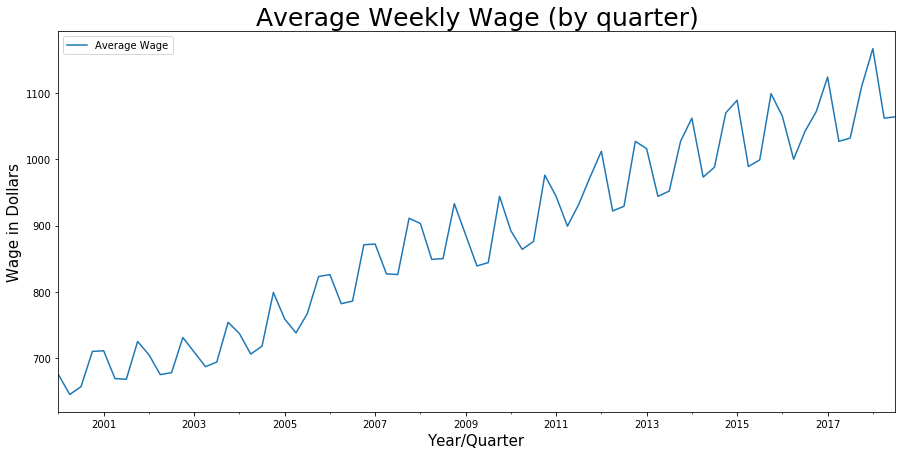

In [290]:
ax = wages['avg_wage'].plot(figsize=(15,7))
ax.set_xlabel('Year/Quarter', fontsize=15)
ax.set_ylabel('Wage in Dollars', fontsize=15)
ax.set_title('Average Weekly Wage (by quarter)', fontsize=25)
ax.legend(labels=['Average Wage']);

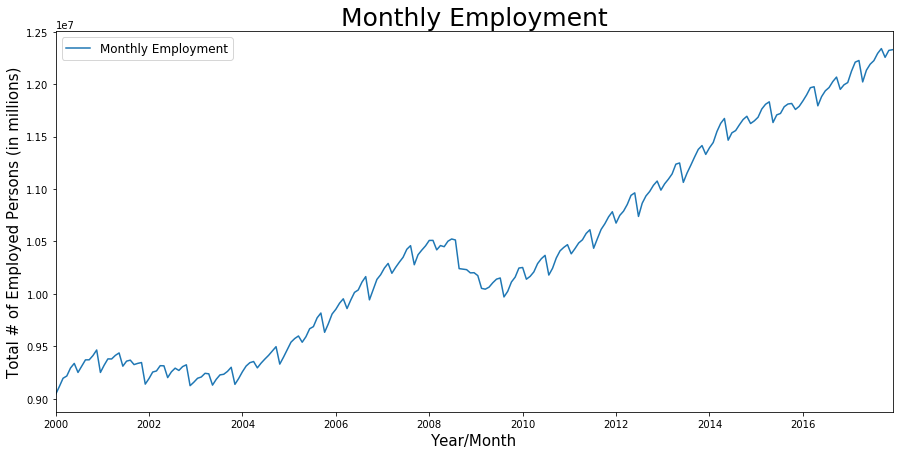

In [288]:
ax = monthly.plot(figsize=(15,7), label='Monthly Employment')
ax.set_xticklabels(['2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018'])
ax.set_xlabel('Year/Month', fontsize=15)
ax.set_ylabel('Total # of Employed Persons (in millions)', fontsize=15)
ax.set_title('Monthly Employment', fontsize=25)

ax.legend(labels=['Monthly Employment'], fontsize=12);

Somewhat interestingly, the average wage is very highly correlated with the number of companies in the state.

In [312]:
wages.corr()[['avg_wage']].sort_values(by='avg_wage', ascending=False)[1:]

,avg_wage
total_wages,0.987663
estabs,0.952854
firms,0.944586
month_3,0.942355
avg_emp,0.939948
month_2,0.939740
month_1,0.937178
period,0.044662


In [325]:
unemployment_quarterly = unemp.resample('Q').mean()
unemployment_quarterly.head()

,initial_claims,continued_claims,covered_employment,unemployment_rate
week_filed,,,,
2000-03-31,13263.916667,116615.166667,8.738970e+06,1.332500
2000-06-30,12830.230769,103216.076923,8.783014e+06,1.175385
2000-09-30,13032.785714,104635.928571,8.827140e+06,1.186429
2000-12-31,15259.692308,105072.307692,8.879290e+06,1.183077
2001-03-31,15460.384615,123040.923077,8.945906e+06,1.375385


# Quarterly Census of Employment and Wages - County

Source: https://texaslmi.com/LMIbyCategory/QCEW

In [344]:
wages_county = pd.read_csv('materials/qcew_county.csv')

In [345]:
# Make index a datetime object of year and quarter; dropping original 'Year' column
wages_county.index = pd.to_datetime(wages_county['Year'].astype(str) + '-Q' + wages_county['Period'].astype(str))
wages_county.drop('Year', axis=1, inplace=True)

# Rename columns
wages_county.columns = ['period', 'county', 'estabs', 'firms', 'avg_emp', 'avg_wage', 
                        'total_wages', 'month_1', 'month_2', 'month_3']

In [346]:
wages_county.head()

,period,county,estabs,firms,avg_emp,avg_wage,total_wages,month_1,month_2,month_3
2000-01-01,1,Loving,13,13,57,797,"593,963",57,58,57
2000-01-01,1,King,21,20,147,534,"1,021,852",140,150,152
2000-01-01,1,Kenedy,24,23,272,374,"1,321,583",273,275,267
2000-01-01,1,Borden,38,31,130,460,"779,350",129,127,135
2000-01-01,1,Kent,37,35,283,367,"1,350,110",288,279,282


In [347]:
for col in wages_county:
    wages_county[col] = wages_county[col].apply(lambda x: str(x).replace(',', ''))
    wages_county[col] = wages_county[col].apply(lambda x: int(x) if x.isdigit() else x)

In [348]:
wages_county.dtypes

period          int64
county         object
estabs          int64
firms           int64
avg_emp         int64
avg_wage        int64
total_wages     int64
month_1         int64
month_2         int64
month_3         int64
dtype: object

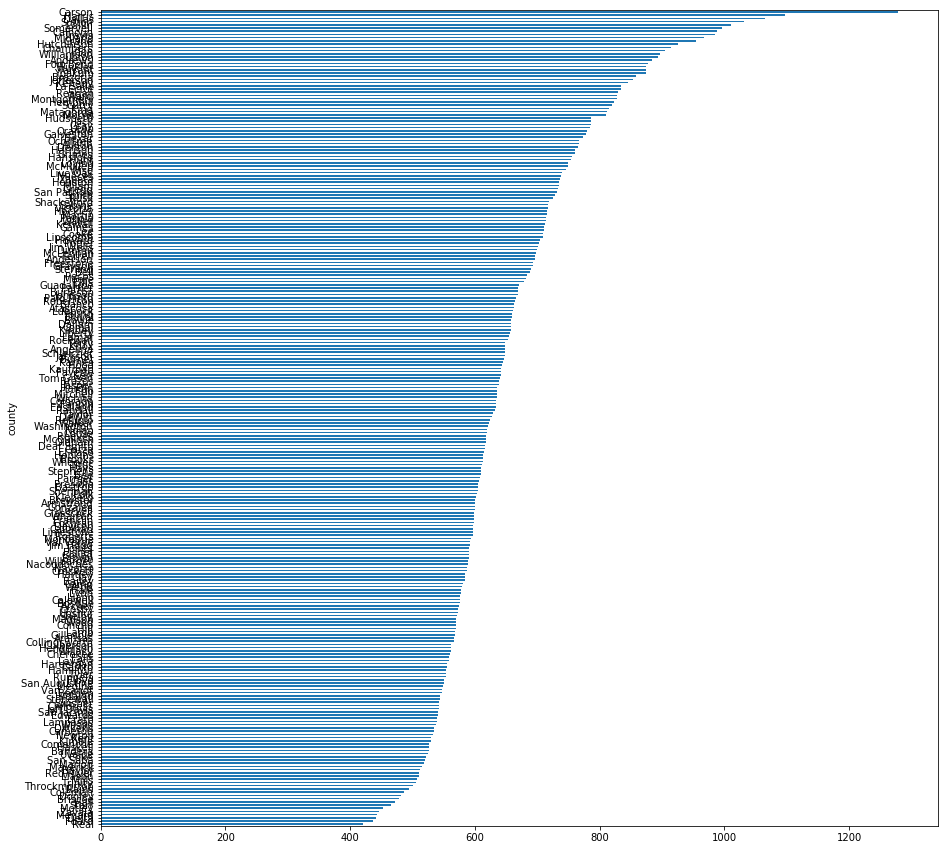

In [380]:
ax = wages_county.groupby('county')['avg_wage'].mean().sort_values().plot(kind='barh', figsize=(15,15));